# Dependencies

In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 8.0
import pandas as pd
import numpy as np
import seaborn as sns

from math import log

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_iris

# Read the CSV and Preform Basic Data Cleaning

In [2]:
gender_df = pd.read_csv("data/gender_submission.csv")
test_df1 = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

# Edit datasets
test_df2 = pd.read_csv("data/test.csv")
train_df2 = pd.read_csv("data/train.csv")

In [3]:
df1 = test_df1.count()
df1 = pd.DataFrame(df1).reset_index().rename(columns={"index":"fields", 0:"fields_value_count"})
df1

,fields,fields_value_count
0,PassengerId,418
1,Pclass,418
2,Name,418
3,Sex,418
4,Age,332
5,SibSp,418
6,Parch,418
7,Ticket,418
8,Fare,417
9,Cabin,91


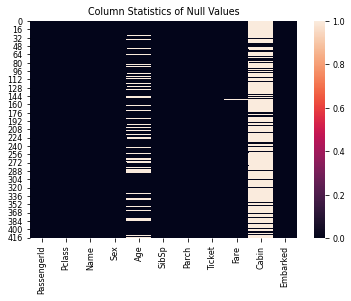

In [4]:
sns.heatmap(test_df1.isnull())
plt.title("Column Statistics of Null Values")
plt.savefig("resource/images/na_test_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

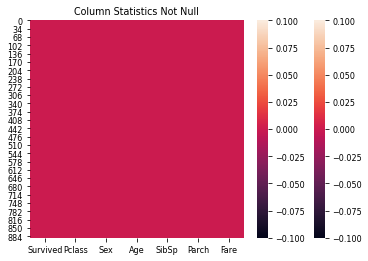

In [5]:
# Droping columns
test_df3 = test_df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
train_df2 = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Because Fare only account for one with Null, we filtering for all row not null. Easy peasy
test_df3 = test_df3[test_df3['Fare'].notna()]

# Replaced null Age value with random number between the youngest and oldest age
test_df3['Age'] = test_df3['Age'].apply(lambda x: x if pd.notnull(x) else np.random.randint(test_df3['Age'].min(), test_df3['Age'].max()))
train_df2['Age'] = train_df2['Age'].apply(lambda x: x if pd.notnull(x) else np.random.randint(train_df2['Age'].min(), train_df2['Age'].max()))

# Because suvvived column is missing from dataset, I used numpy to randomly add 0 and 1 for survived or not as a column
test_df3['Survived'] = np.random.randint(2, size=len(test_df3))

# Save As test_df
test_df = test_df3
train_df = train_df2

sns.heatmap(test_df3.isnull())
plt.title("Column Statistics Not Null", )
plt.savefig("resource/images/not_na_test_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

sns.heatmap(train_df2.isnull())
plt.title("Column Statistics Not Null", )
plt.savefig("resource/images/not_na_train_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

## New Age Table

In [6]:
test_df2 = test_df2.loc[test_df2['Age'].isnull()]
test_df2['New Age'] = test_df3['Age'].copy()
new_age = test_df2[['PassengerId', 'Sex', 'Age', 'New Age']]
new_age

,PassengerId,Sex,Age,New Age
10,902,male,NaN,24.0
22,914,female,NaN,41.0
29,921,male,NaN,21.0
33,925,female,NaN,15.0
36,928,female,NaN,8.0
...,...,...,...,...
408,1300,female,NaN,42.0
410,1302,female,NaN,10.0
413,1305,male,NaN,14.0
416,1308,male,NaN,49.0


# Logistic Regression

Preparing features columns and output of x and y

In [7]:
x = pd.get_dummies(train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
y = train_df['Survived']
print(x.shape, y.shape)
print(x)
print(y)

(891, 7) (891,)
     Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male
0         3  22.0      1      0   7.2500           0         1
1         1  38.0      1      0  71.2833           1         0
2         3  26.0      0      0   7.9250           1         0
3         1  35.0      1      0  53.1000           1         0
4         3  35.0      0      0   8.0500           0         1
..      ...   ...    ...    ...      ...         ...       ...
886       2  27.0      0      0  13.0000           0         1
887       1  19.0      0      0  30.0000           1         0
888       3  67.0      1      2  23.4500           1         0
889       1  26.0      0      0  30.0000           0         1
890       3  32.0      0      0   7.7500           0         1

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Fitting x and y using sklearn

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

# Classifying data for Logistic Regression

In [9]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

# Scoring Classifiers

In [10]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.7919161676646707
Testing Data Score: 0.7982062780269058


# Creating test dataset to run the machine learning model on

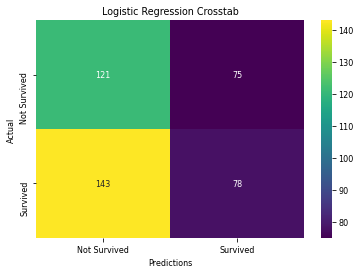

In [11]:
x_test_sur = pd.get_dummies(test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
y_test_sur = test_df['Survived']

# Creating predictions
predictions = classifier.predict(x_test_sur)

# Creating prediction vs actual Dataset
testing = pd.DataFrame({"Predictions": predictions, "Actual": y_test_sur})
testing.loc[(testing["Predictions"] == 0), "Predictions" ] = "Not Survived"
testing.loc[(testing["Predictions"] == 1), "Predictions" ] = "Survived"
testing.loc[(testing["Actual"] == 0), "Actual" ] = "Not Survived"
testing.loc[(testing["Actual"] == 1), "Actual" ] = "Survived"
testing

# Creating Crosstab Dataset
testing_crosstab = pd.crosstab(testing['Actual'], testing['Predictions'])

# Creating Visual for Crosstab
logistic_regression_heatmap = sns.heatmap(testing_crosstab, cmap="viridis", fmt="g", annot=True, annot_kws={'ha':'center','va':'center'})
bottom, top = logistic_regression_heatmap.get_ylim()
plt.title("Logistic Regression Crosstab")
plt.savefig("resource/images/crosstab_prediction_heatmap.png", bbox_inches='tight', pad_inches=0.5)

# Decision Tree

In [12]:
x = pd.get_dummies(train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
y = train_df['Survived'].values.reshape(-1,1)
feature_names = x
# print(x.shape, y.shape)
# print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.7668161434977578

# Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.27454596433057377, 'Age'),
 (0.2738209079631646, 'Fare'),
 (0.14806530336801346, 'Sex_female'),
 (0.13417948642054628, 'Sex_male'),
 (0.0801348384609307, 'Pclass'),
 (0.048742254054116835, 'SibSp'),
 (0.04051124540265422, 'Parch')]